In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\USER\OneDrive\Desktop\machine_learning\Week1\chip_dataset.csv')
df.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


In [5]:
df.describe()

,Freq (GHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4508.000000,800.000000,1685.000000,1278.000000
mean,1615.430790,19033.061063,5403.009359,1096.608263
std,1084.641452,44865.341218,11492.095538,5232.537404
min,100.000000,10.020000,12.800000,3.600000
25%,650.000000,1299.500000,384.000000,59.247500
50%,1400.000000,6136.500000,1248.000000,136.350000
75%,2500.000000,20175.000000,5069.000000,382.450000
max,4700.000000,653700.000000,93240.000000,81720.000000


In [6]:
# Total missing values per column
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percent Missing': missing_percent})
print(missing_data)

                       Missing Values  Percent Missing
FP16 GFLOPS                      4145        83.822042
FP64 GFLOPS                      3667        74.155713
FP32 GFLOPS                      3260        65.925177
Foundry                           615        12.436805
Transistors (million)             555        11.223458
TDP (W)                           437         8.837209
Freq (GHz)                        437         8.837209
Die Size (mm^2)                   352         7.118301
Release Date                      199         4.024267
Process Size (nm)                   0         0.000000
Type                                0         0.000000
Product                             0         0.000000
Vendor                              0         0.000000


In [7]:
df.shape

(4945, 13)

# MISSINGNESS

In [8]:
df.drop(columns=['FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'], inplace=True)

In [9]:
# Convert numeric columns from string to float
num_cols = ['TDP (W)', 'Freq (GHz)', 'Die Size (mm^2)', 'Transistors (million)']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [12]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')
df[num_cols] = median_imputer.fit_transform(df[num_cols])

In [13]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['Foundry']] = cat_imputer.fit_transform(df[['Foundry']])

In [16]:
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%Y-%m-%d', errors='coerce')
df['Year'] = df['Release Date'].dt.year
df.dropna(subset=['Release Date'], inplace=True)

In [17]:
df.isnull().sum()

Product                  0
Type                     0
Release Date             0
Process Size (nm)        0
TDP (W)                  0
Die Size (mm^2)          0
Transistors (million)    0
Freq (GHz)               0
Foundry                  0
Vendor                   0
Year                     0
dtype: int64

# Moore's Law still holds, especially in GPUs.

In [18]:
gpu_df = df[df['Type'].str.upper() == 'GPU'].copy()
gpu_transistor_trend = gpu_df.groupby('Year')['Transistors (million)'].mean().reset_index()

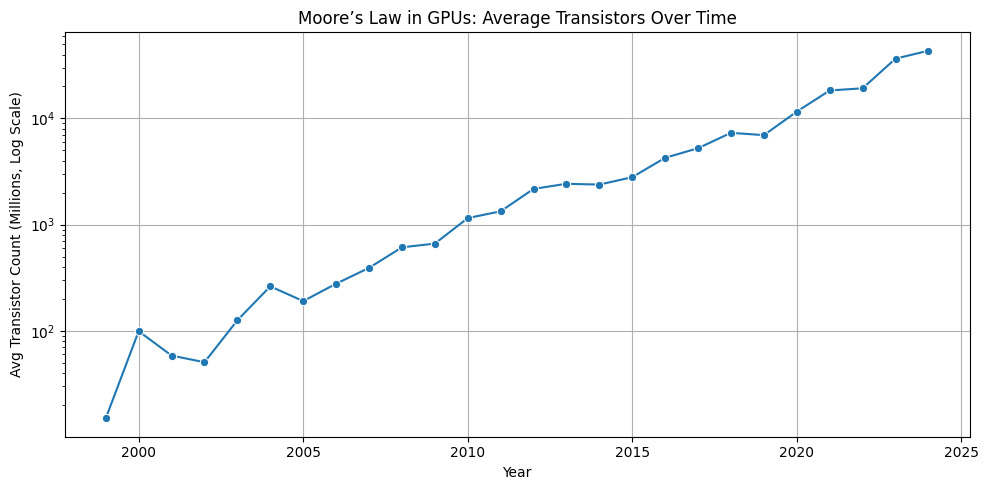

In [21]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=gpu_transistor_trend, x='Year', y='Transistors (million)', marker='o')
plt.yscale('log')
plt.title("Moore’s Law in GPUs: Average Transistors Over Time")
plt.xlabel("Year")
plt.ylabel("Avg Transistor Count (Millions, Log Scale)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Dannard Scaling is still valid in general.

In [23]:
df['Process Size (nm)'] = pd.to_numeric(df['Process Size (nm)'], errors='coerce')

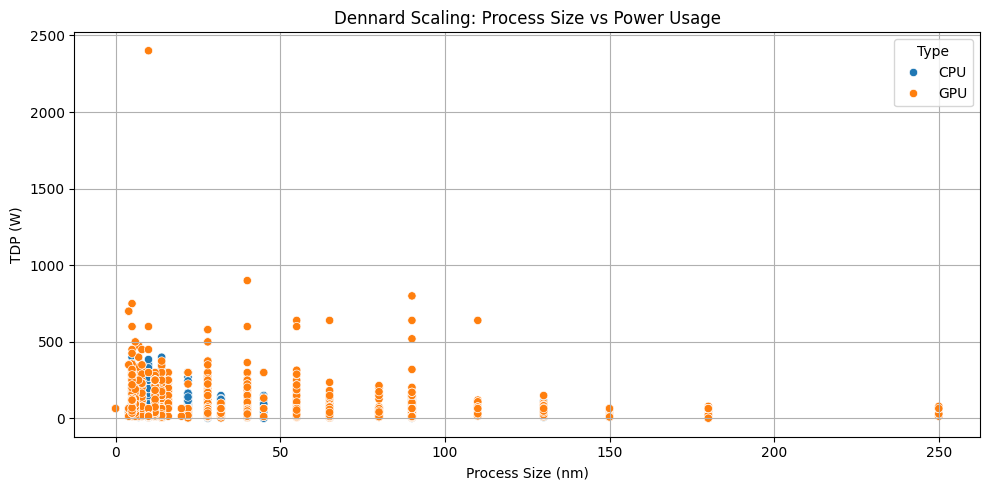

In [24]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Process Size (nm)', y='TDP (W)', hue='Type')
plt.title("Dennard Scaling: Process Size vs Power Usage")
plt.xlabel("Process Size (nm)")
plt.ylabel("TDP (W)")
plt.grid(True)
plt.tight_layout()
plt.show()

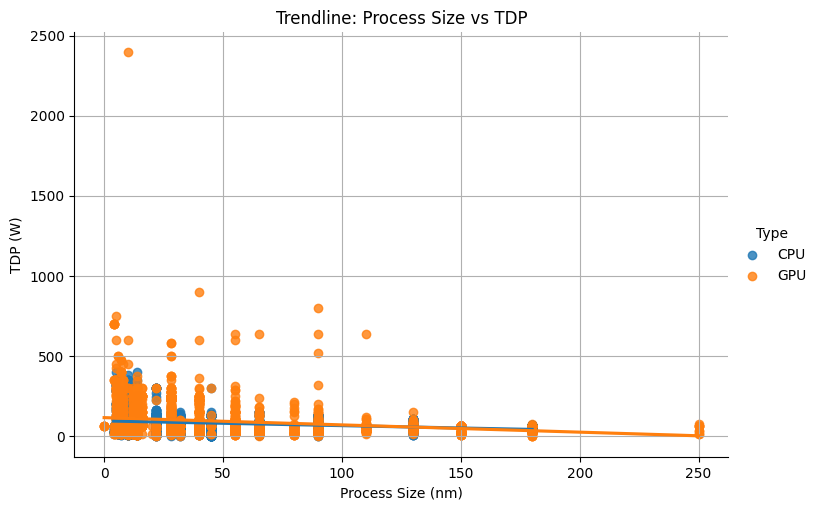

In [25]:
sns.lmplot(data=df, x='Process Size (nm)', y='TDP (W)', hue='Type', aspect=1.5)
plt.title("Trendline: Process Size vs TDP")
plt.grid(True)
plt.show()

# CPUs have higher frequencies, but GPUs are catching up.

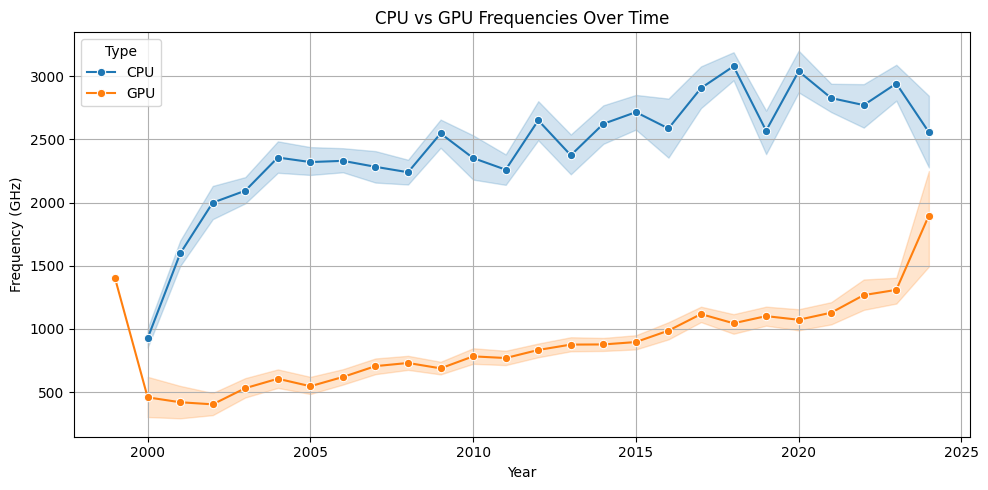

In [26]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Year', y='Freq (GHz)', hue='Type', marker='o')
plt.title("CPU vs GPU Frequencies Over Time")
plt.xlabel("Year")
plt.ylabel("Frequency (GHz)")
plt.grid(True)
plt.tight_layout()
plt.show()

# GPU performance doubles every 1.5 years.

In [27]:
raw_df = pd.read_csv(r'C:\Users\USER\OneDrive\Desktop\machine_learning\Week1\chip_dataset.csv')

In [28]:
fp32_df = raw_df[['Product', 'FP32 GFLOPS']].copy()

In [29]:
df = df.merge(fp32_df, on='Product', how='left')
df['FP32 GFLOPS'] = pd.to_numeric(df['FP32 GFLOPS'], errors='coerce')

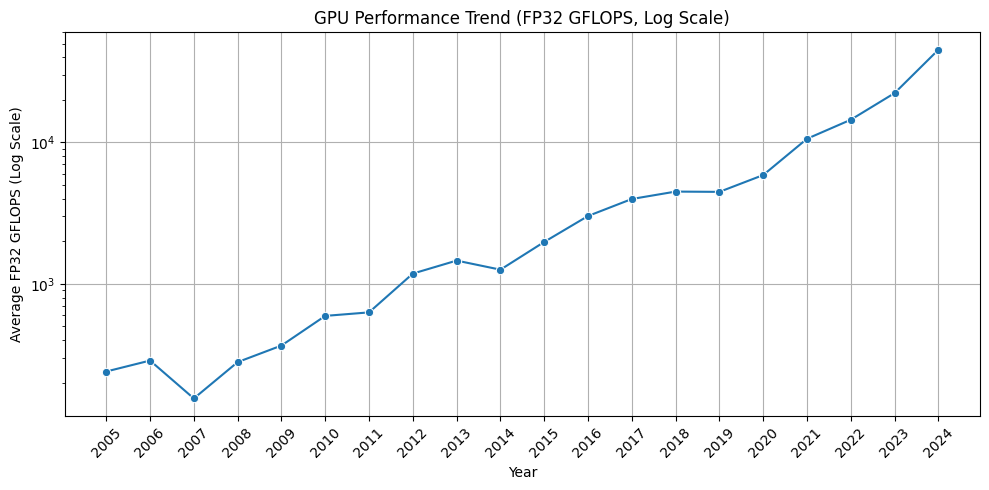

In [35]:
gpu_perf = df[(df['Type'].str.upper() == 'GPU') & (df['FP32 GFLOPS'].notnull())].copy()
perf_trend = gpu_perf.groupby('Year')['FP32 GFLOPS'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=perf_trend, x='Year', y='FP32 GFLOPS', marker='o')
plt.yscale('log')
plt.title("GPU Performance Trend (FP32 GFLOPS, Log Scale)")
plt.xlabel("Year")
plt.ylabel("Average FP32 GFLOPS (Log Scale)")
plt.xticks(ticks=perf_trend['Year'].unique())
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.

In [36]:
gpu_perf = df[
    (df['Type'].str.upper() == 'GPU') &
    (df['FP32 GFLOPS'].notnull()) &
    (df['Die Size (mm^2)'].notnull()) &
    (df['Freq (GHz)'].notnull()) &
    (df['Process Size (nm)'].notnull())
].copy()

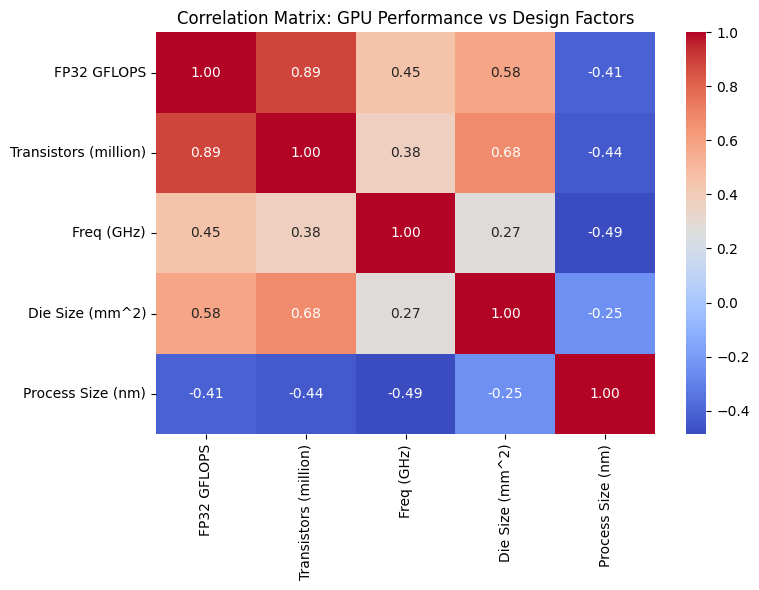

In [37]:
features = ['FP32 GFLOPS', 'Transistors (million)', 'Freq (GHz)', 'Die Size (mm^2)', 'Process Size (nm)']

corr = gpu_perf[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: GPU Performance vs Design Factors")
plt.tight_layout()
plt.show()

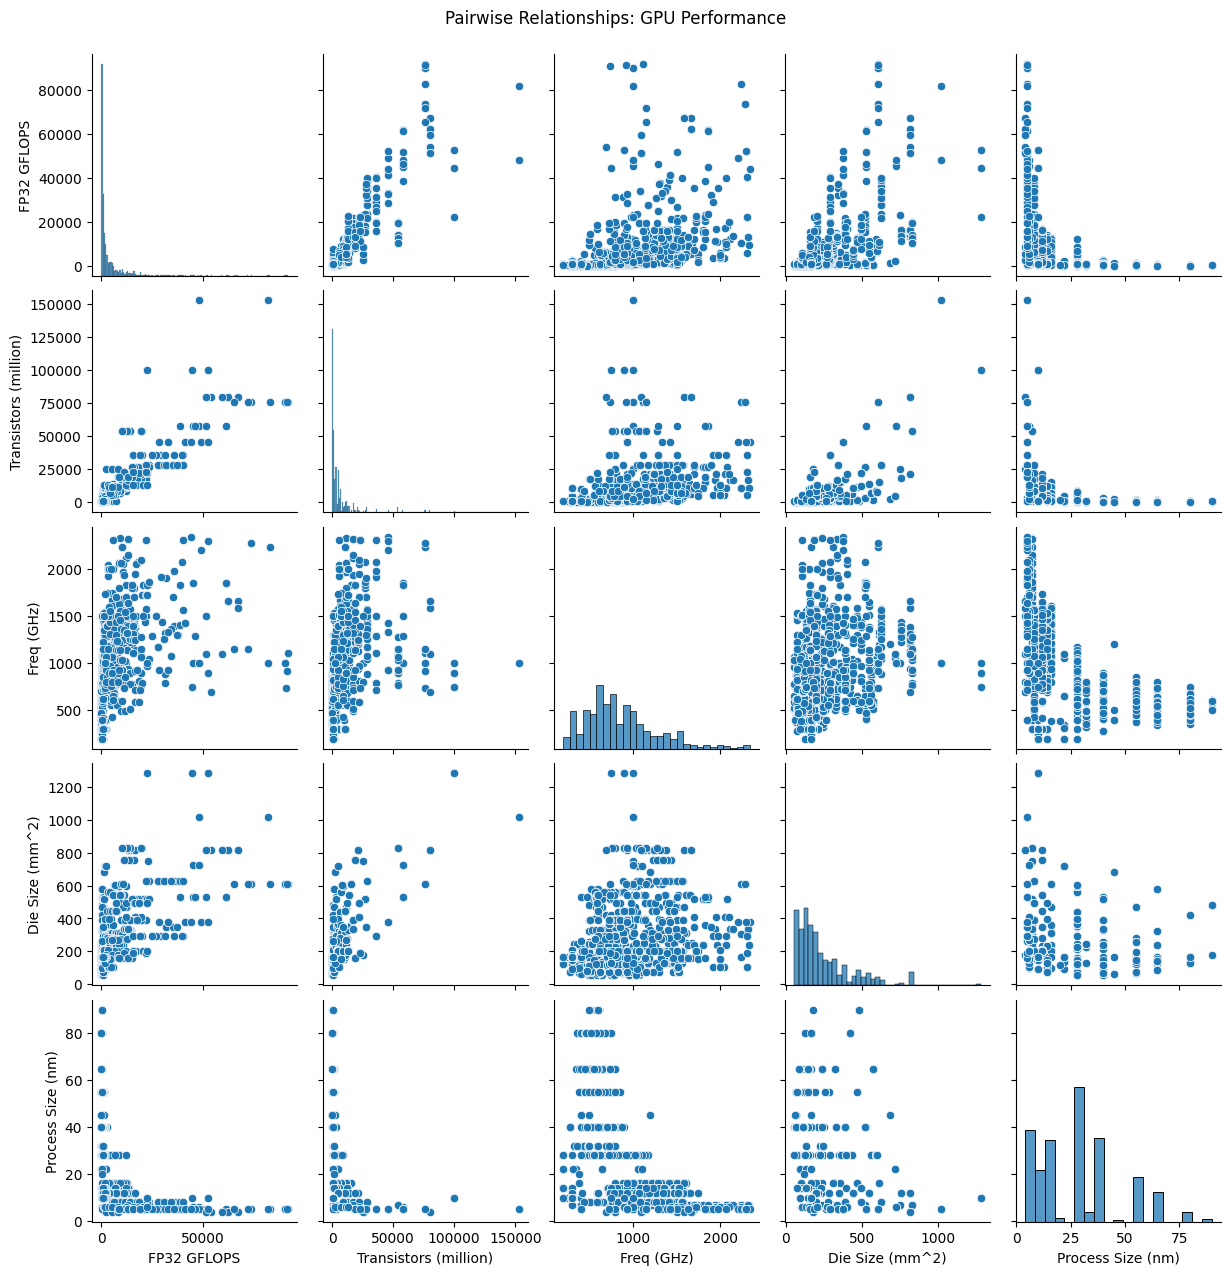

In [38]:
sns.pairplot(gpu_perf[features])
plt.suptitle("Pairwise Relationships: GPU Performance", y=1.02)
plt.show()

# High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.

In [39]:
gpu_perf = df[(df['Type'].str.upper() == 'GPU') & (df['FP32 GFLOPS'].notnull())].copy()

# quantile bins
gpu_perf['Perf Tier'] = pd.qcut(gpu_perf['FP32 GFLOPS'], q=3, labels=['Low-end', 'Mid-range', 'High-end'])

In [40]:
tier_trend = gpu_perf.groupby(['Year', 'Perf Tier'])['Process Size (nm)'].mean().reset_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_16100\3542115699.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_trend = gpu_perf.groupby(['Year', 'Perf Tier'])['Process Size (nm)'].mean().reset_index()


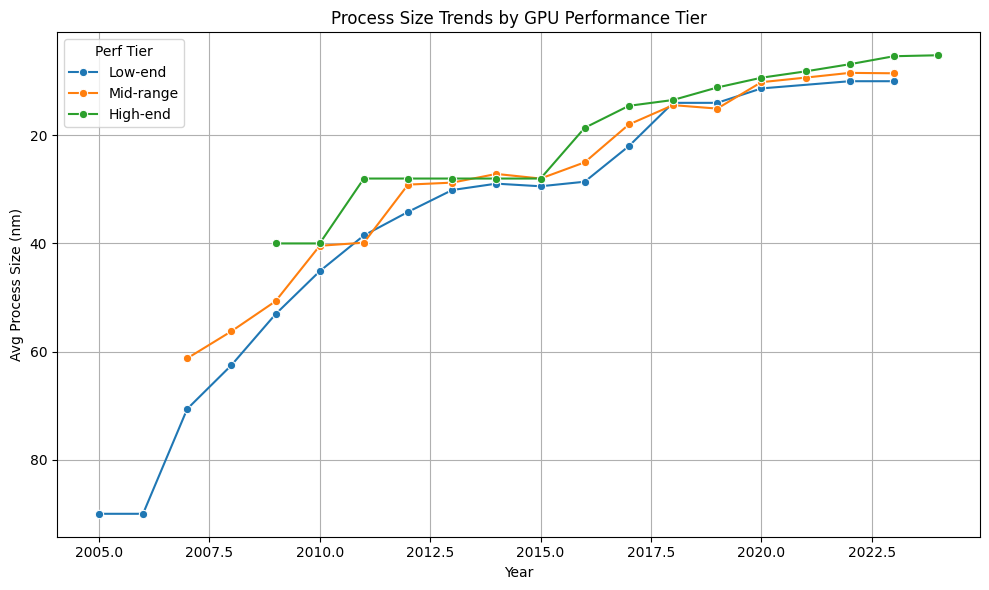

In [41]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=tier_trend, x='Year', y='Process Size (nm)', hue='Perf Tier', marker='o')
plt.title("Process Size Trends by GPU Performance Tier")
plt.xlabel("Year")
plt.ylabel("Avg Process Size (nm)")
plt.gca().invert_yaxis()  # smaller nm is better
plt.grid(True)
plt.tight_layout()
plt.show()

# Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors

In [42]:
vendor_df = df[['Vendor', 'Process Size (nm)']].copy()
vendor_df = vendor_df.dropna()

In [43]:
top_vendors = ['Intel', 'AMD', 'Nvidia', 'ATI']

# Create new column to group other vendors
vendor_df['Vendor Group'] = vendor_df['Vendor'].apply(lambda x: x if x in top_vendors else 'Other')

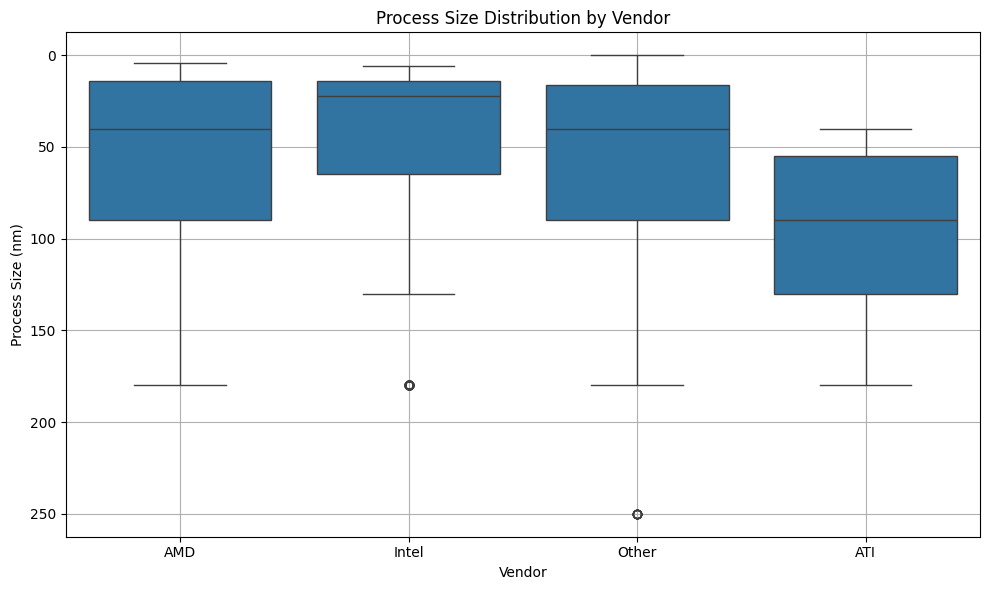

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=vendor_df, x='Vendor Group', y='Process Size (nm)')
plt.title("Process Size Distribution by Vendor")
plt.xlabel("Vendor")
plt.ylabel("Process Size (nm)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

# TSMC makes the highest number of chips in the world

In [45]:
foundry_counts = df['Foundry'].value_counts().reset_index()
foundry_counts.columns = ['Foundry', 'Chip Count']

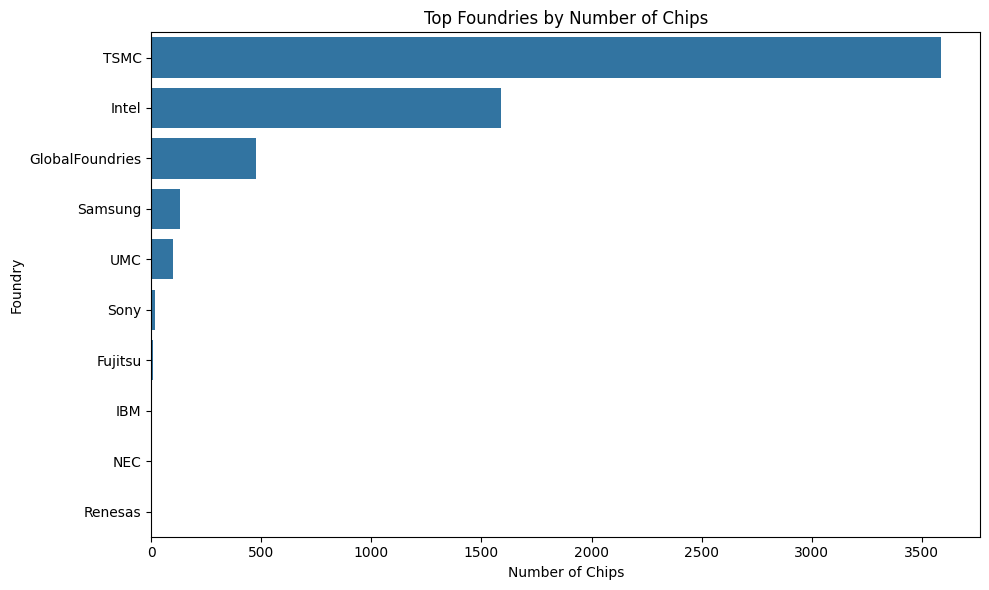

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(data=foundry_counts.head(10), x='Chip Count', y='Foundry')
plt.title("Top Foundries by Number of Chips")
plt.xlabel("Number of Chips")
plt.ylabel("Foundry")
plt.tight_layout()
plt.show()

# Calculate and visualized the correlation among the features

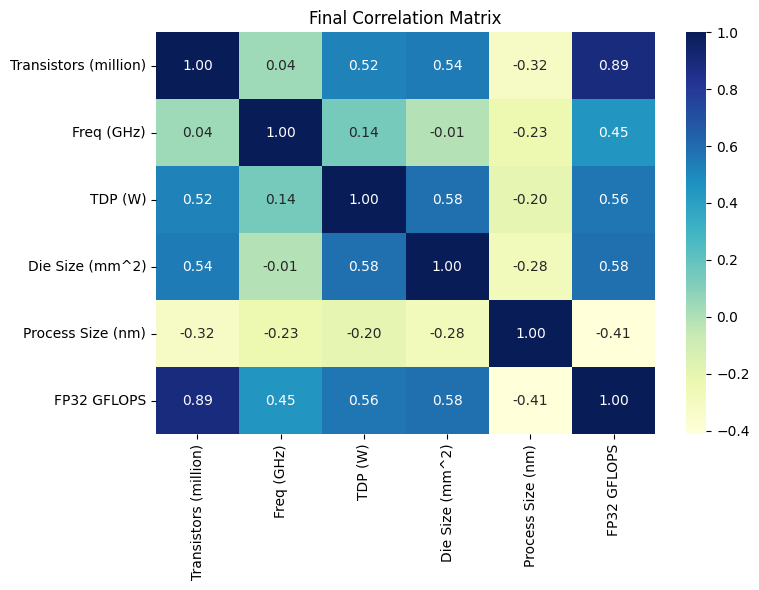

In [47]:
num_features = [
    'Transistors (million)', 'Freq (GHz)', 'TDP (W)',
    'Die Size (mm^2)', 'Process Size (nm)', 'FP32 GFLOPS'
]

corr = df[num_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Final Correlation Matrix")
plt.tight_layout()
plt.show()

# Perfom the correct encoding for your data, in readiness for modelling.

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Type_encoded'] = le.fit_transform(df['Type'])
df['Foundry_encoded'] = le.fit_transform(df['Foundry'])
df['Vendor_encoded'] = le.fit_transform(df['Vendor'])

In [49]:
df.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,Year,FP32 GFLOPS,Type_encoded,Foundry_encoded,Vendor_encoded
0,AMD Athlon 1000,CPU,2000-06-05,180.0,54.0,120.0,37.0,1000.0,TSMC,AMD,2000,NaN,0,8,1
1,AMD Athlon 1000,CPU,2000-06-05,180.0,54.0,120.0,37.0,1000.0,TSMC,AMD,2000,NaN,0,8,1
2,AMD Athlon 1000,CPU,2000-10-31,180.0,54.0,120.0,37.0,1000.0,TSMC,AMD,2000,NaN,0,8,1
3,AMD Athlon 1000,CPU,2000-10-31,180.0,54.0,120.0,37.0,1000.0,TSMC,AMD,2000,NaN,0,8,1
4,AMD Athlon 1100,CPU,2000-08-14,180.0,60.0,120.0,37.0,1100.0,TSMC,AMD,2000,NaN,0,8,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                5913 non-null   object        
 1   Type                   5913 non-null   object        
 2   Release Date           5913 non-null   datetime64[ns]
 3   Process Size (nm)      5833 non-null   float64       
 4   TDP (W)                5913 non-null   float64       
 5   Die Size (mm^2)        5913 non-null   float64       
 6   Transistors (million)  5913 non-null   float64       
 7   Freq (GHz)             5913 non-null   float64       
 8   Foundry                5913 non-null   object        
 9   Vendor                 5913 non-null   object        
 10  Year                   5913 non-null   int32         
 11  FP32 GFLOPS            1891 non-null   float64       
 12  Type_encoded           5913 non-null   int64         
 13  Fou

In [51]:
df.to_csv('chip_dataset_cleaned.csv', index=False)